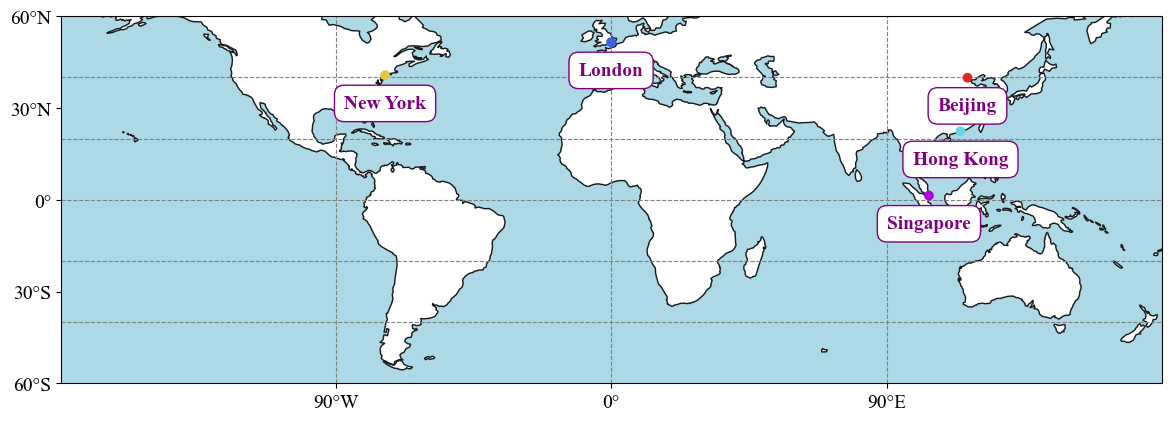

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['font.size'] = 14

coordinates=[
    ["51.5118","-0.1167"],
    ["40.71427", "-74.00597"],
    ["39.9041999", "116.4073963"],
    ["22.396428", "114.109497"],
    ["1.36666666", "103.8"]]

cities = ["London", "New York", "Beijing", "Hong Kong", "Singapore"]
colors = ["#3964DF", "#E0C645","#E02927",  "#65D8DF", "#AE02DE"]

rc={'font.size': 16}
plt.rcParams.update(**rc)
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

lon = np.arange(-180, 180)
lat = np.arange(-90, 90)

ax.scatter([float(i[1]) for i in coordinates],[float(i[0]) for i in coordinates], 
           color=colors, marker="o"
           , s=50, zorder=5, edgecolor="none",
           linewidth=0.5, transform=ccrs.PlateCarree())

for i, txt in enumerate(cities):
    ax.text(float(coordinates[i][1]), float(coordinates[i][0])-12, 
            txt, color="purple", 
            zorder=5, 
            ha="center", va="bottom",
            fontdict={'color':  'black', 'weight': 'bold', 'size': 14},
            bbox=dict(facecolor='white', edgecolor='purple', boxstyle='round,pad=0.5'))

ax.coastlines(color="0.1")
ax.add_feature(cfeature.OCEAN, zorder=0, color="lightblue")
g = ax.gridlines(color='grey', linestyle='--', draw_labels=False,zorder=4)
g.xlocator = mticker.FixedLocator([-90, 0, 90])
lon_formatter = LongitudeFormatter()#zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_yticks(np.array([-60,-30,0,30,60]), crs=ccrs.PlateCarree())
ax.set_xticks(np.linspace(-90, 90, 3), crs=ccrs.PlateCarree())
ax.set_xlim(-180, 180)
fig.tight_layout()
fig.savefig("figs/0_cities.pdf", dpi=300)
fig.show()